# Performance of average random grid

In [1]:
import os

from aemeasure import read_as_pd
import pandas as pd

from pcpptc import PolygonInstance


data = pd.read_json("./01c_data.json")

In [2]:
# Sort data to be displayed in legend correctly
def order(row):
    i = 0
    if "Triangular" in row["Grid"]:
        i += 2
    if "Line" in row["Grid"]:
        i += 1
    return i


data["order"] = data.apply(order, axis=1)
data.sort_values(by=["order"], inplace=True)

In [3]:
t = data[data["solver"].str.contains("Rotating")]
t.groupby("Grid")["relative_cost"].mean()

Grid
Square, Line-based         1.099354
Square, Point-based        1.585849
Triangular, Line-based     1.027059
Triangular, Point-based    1.386815
Name: relative_cost, dtype: float64

In [4]:
t = data[~data["solver"].str.contains("Rotating")]
t = t.groupby(["Grid", "instance"])["relative_cost"].min().reset_index()
t.drop_duplicates(subset=["instance", "Grid"], inplace=True)
t.groupby(["Grid"])["relative_cost"].mean()

Grid
Square, Line-based         1.091999
Square, Point-based        1.548356
Triangular, Line-based     1.006241
Triangular, Point-based    1.360278
Name: relative_cost, dtype: float64

In [5]:
t = data
t = t.groupby(["Grid", "instance"])["relative_cost"].min().reset_index()
t.drop_duplicates(subset=["instance", "Grid"], inplace=True)
t.groupby(["Grid"])["relative_cost"].mean()

Grid
Square, Line-based         1.072398
Square, Point-based        1.535116
Triangular, Line-based     1.002512
Triangular, Point-based    1.354748
Name: relative_cost, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

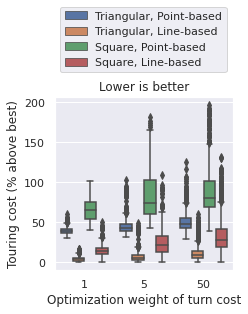

In [10]:
t = data[~data["solver"].str.contains("Rotating")].copy()


def order(row):
    i = 0
    if "Triangular" in row["Grid"]:
        i += 2
    if "Line" in row["Grid"]:
        i += 1
    return i


t["order"] = t.apply(order, axis=1)
# t.sort_values(by=["order"], inplace=True)
t.sort_values(by=["Grid"], ascending=False, inplace=True)
plt.figure(figsize=(3.5, 3.5))

t["y"] = (t["relative_cost"] - 1) * 100
sns.boxplot(data=t, x="turn_factor", y="y", hue="Grid")
plt.ylabel("Touring cost (% above best)")
plt.xlabel("Optimization weight of turn cost")
plt.title("Lower is better")
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(0.0, 1.55))
ax = plt.gca()
# ax.set_yticklabels([f"+{int(s)}%" for s in ax.get_yticks()])
plt.savefig("./output/08_avg_alignment.pdf", bbox_inches="tight")
plt.show()